# Figure 6 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is from postprocessed npz files based on ESGF copy of TRACMIP at KIT SCC LSDFONLINE.

In [1]:
import numpy as np

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Obtain precipitation data

In [2]:
pr_aqct = 86400*np.array(np.load('./postdata_npz/pr_aquaControlTRACMIP.timmean.npz')['pr'])
pr_aq4x = 86400*np.array(np.load('./postdata_npz/pr_aqua4xCO2TRACMIP.timmean.npz'  )['pr'])
pr_ldct = 86400*np.array(np.load('./postdata_npz/pr_landControlTRACMIP.timmean.npz')['pr'])
pr_ld4x = 86400*np.array(np.load('./postdata_npz/pr_land4xCO2TRACMIP.timmean.npz'  )['pr'])
pr_ldor = 86400*np.array(np.load('./postdata_npz/pr_landOrbitTRACMIP.timmean.npz'  )['pr'])

## Model median ITCZ

In [3]:
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules')
import atmosphere as atm

In [4]:
itcz_aqct_mm = np.zeros(tm.nlonint) + np.nan
itcz_aq4x_mm = np.zeros(tm.nlonint) + np.nan
itcz_ldct_mm = np.zeros(tm.nlonint) + np.nan
itcz_ld4x_mm = np.zeros(tm.nlonint) + np.nan
itcz_ldor_mm = np.zeros(tm.nlonint) + np.nan
for i in range(0, tm.nlonint):
    itcz_aqct_mm[i] = atm.get_itczposition(np.nanmedian(pr_aqct[tm.modlist_aqct, :, i], axis=0), tm.latint, 30.0, 0.1)
    itcz_aq4x_mm[i] = atm.get_itczposition(np.nanmedian(pr_aq4x[tm.modlist_aq4x, :, i], axis=0), tm.latint, 30.0, 0.1)
    itcz_ldct_mm[i] = atm.get_itczposition(np.nanmedian(pr_ldct[tm.modlist_ldct, :, i], axis=0), tm.latint, 30.0, 0.1)
    itcz_ld4x_mm[i] = atm.get_itczposition(np.nanmedian(pr_ld4x[tm.modlist_ld4x, :, i], axis=0), tm.latint, 30.0, 0.1)
    itcz_ldor_mm[i] = atm.get_itczposition(np.nanmedian(pr_ldor[tm.modlist_ldor, :, i], axis=0), tm.latint, 30.0, 0.1)

## Plotting of figure 6 of JAMES 2016 paper

In [5]:
sinlat = np.sin(tm.latint * np.pi/180.0)

In [6]:
def make_nice_plot(ax, title):
    plt.xlim(-178, 178), plt.ylim(-0.98, 0.98)
    ax.xaxis.set_ticks([-120, -60, 0, 60, 120])
    ax.xaxis.set_ticklabels([''],fontsize=10)
    ax.yaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
    ax.yaxis.set_ticklabels([''], fontsize=10)
    plt.title(title, fontsize=14)

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

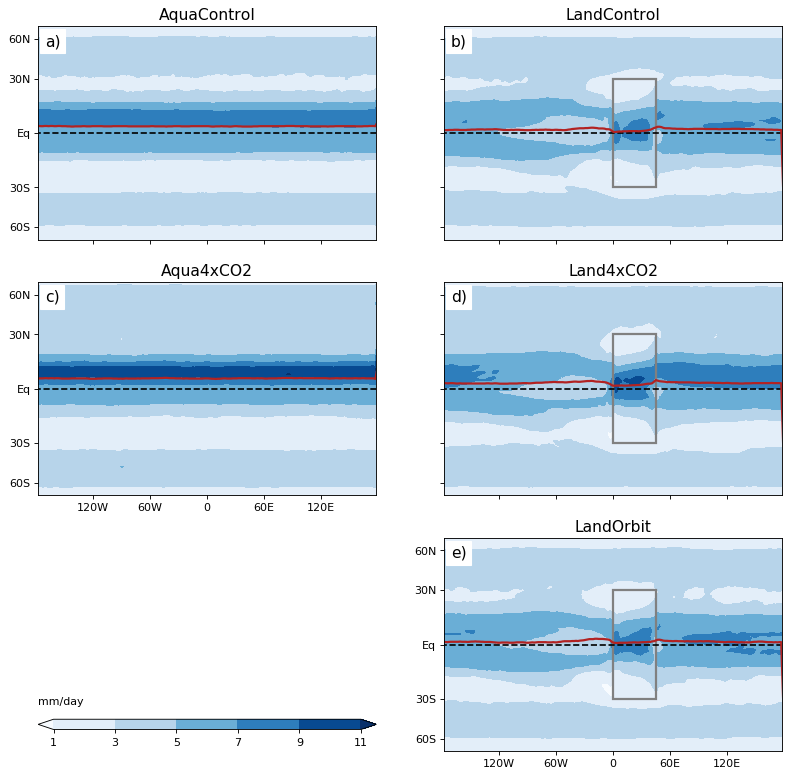

In [8]:
plt.figure( figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

clev = np.array([1, 3, 5, 7, 9, 11])

ax = plt.subplot(3, 2, 1)
plt.contourf(tm.lonint, sinlat, np.nanmedian(pr_aqct[tm.modlist_aqct], axis=0), clev, cmap=cm.Blues, extend='both')
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(tm.lonint, np.sin(itcz_aqct_mm*np.pi/180.0), 'firebrick', linewidth=2)
make_nice_plot(ax, 'AquaControl')#, plt.ylabel('hPa', fontsize=12)
ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
plt.text(0.02, 0.93, 'a)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 3)
c=plt.contourf(tm.lonint, sinlat, np.nanmedian(pr_aq4x[tm.modlist_aq4x], axis=0), clev, cmap=cm.Blues, extend='both')
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(tm.lonint, np.sin(itcz_aq4x_mm*np.pi/180.0), 'firebrick', linewidth=2)
make_nice_plot(ax, 'Aqua4xCO2')
ax.xaxis.set_ticklabels(['120W', '60W', '0', '60E', '120E'],fontsize=10)
ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
plt.text(0.02, 0.93, 'c)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 5)
ax.axis('off')
cbar = plt.colorbar(c, ticks=clev, orientation='horizontal', aspect=30)
cbar.ax.tick_params(labelsize=10) 
plt.text(0, -0.1, 'mm/day', fontsize=10, ha='left', va='center', transform=ax.transAxes)

ax = plt.subplot(3, 2, 2)
plt.contourf(tm.lonint, sinlat, np.nanmedian(pr_ldct[tm.modlist_ldct], axis=0), clev, cmap=cm.Blues, extend='both')
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(tm.lonint, np.sin(itcz_ldct_mm*np.pi/180.0), 'firebrick', linewidth=2)
make_nice_plot(ax, 'LandControl')
ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
plt.text(0.02, 0.93, 'b)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 4)
plt.contourf(tm.lonint, sinlat, np.nanmedian(pr_ld4x[tm.modlist_ld4x], axis=0), clev, cmap=cm.Blues, extend='both')
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(tm.lonint, np.sin(itcz_ld4x_mm*np.pi/180.0), 'firebrick', linewidth=2)
make_nice_plot(ax, 'Land4xCO2')
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
plt.text(0.02, 0.93, 'd)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 6)
plt.contourf(tm.lonint, sinlat, np.nanmedian(pr_ldor[tm.modlist_ldor], axis=0), clev, cmap=cm.Blues, extend='both')
plt.plot([-200, 200], [0, 0], 'k--')
plt.plot(tm.lonint, np.sin(itcz_ldor_mm*np.pi/180.0), 'firebrick', linewidth=2)
make_nice_plot(ax, 'LandOrbit')
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
ax.xaxis.set_ticklabels(['120W', '60W', '0', '60E', '120E'],fontsize=10)
ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
plt.text(0.02, 0.93, 'e)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

plt.tight_layout
plt.savefig('figs/corrigendumpaper_figure6.pdf')